In [1]:
import pandas as pd
train_df= pd.read_csv('train.csv')
test_df= pd.read_csv('test.csv')

#Dropping columns with too many null values and setting index 
train_df.drop('County',axis=1,inplace=True)
train_df.drop('Province_State',axis=1,inplace=True)
train_df.set_index('Id',inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748008 entries, 1 to 969576
Data columns (total 6 columns):
Country_Region    748008 non-null object
Population        748008 non-null int64
Weight            748008 non-null float64
Date              748008 non-null object
Target            748008 non-null object
TargetValue       748008 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 39.9+ MB


In [2]:
#PREPROCESSING OF TRAINING DATASET FOR MODELLING 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#LabelEncoder can be used to normalize labels.
#fit_trainsform - Fit label encoder and return encoded labels
train_df['Target_numerical'] = le.fit_transform(train_df['Target'])
train_df['Country_numerical']= le.fit_transform(train_df['Country_Region'])


train_df['Date'] = pd.to_datetime(train_df['Date'])


train_df['Dayofweek'] = train_df['Date'].dt.dayofweek
train_df['Day'] = train_df['Date'].dt.day
train_df['Month'] = train_df['Date'].dt.month



In [3]:
train_df.head()

,Country_Region,Population,Weight,Date,Target,TargetValue,Target_numerical,Country_numerical,Dayofweek,Day,Month
Id,,,,,,,,,,,
1,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0,0,0,3,23,1
2,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0,1,0,3,23,1
3,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0,0,0,4,24,1
4,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0,1,0,4,24,1
5,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0,0,0,5,25,1


In [4]:
#PERFORMING SAME ON TESTING DATASET 

test_df= pd.read_csv('test.csv')

test_df.drop(['Province_State','County'],axis=1,inplace=True)
test_df['Target_numerical'] = le.fit_transform(test_df['Target'])
test_df['Country_numerical']= le.fit_transform(test_df['Country_Region'])


test_df['Date'] = pd.to_datetime(test_df['Date'])


test_df['Dayofweek'] = test_df['Date'].dt.dayofweek
test_df['Day'] = test_df['Date'].dt.day
test_df['Month'] = test_df['Date'].dt.month

In [5]:
test_df.set_index('ForecastId',inplace=True)
test_df.head()

,Country_Region,Population,Weight,Date,Target,Target_numerical,Country_numerical,Dayofweek,Day,Month
ForecastId,,,,,,,,,,
1,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases,0,0,0,27,4
2,Afghanistan,27657145,0.583587,2020-04-27,Fatalities,1,0,0,27,4
3,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases,0,0,1,28,4
4,Afghanistan,27657145,0.583587,2020-04-28,Fatalities,1,0,1,28,4
5,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases,0,0,2,29,4


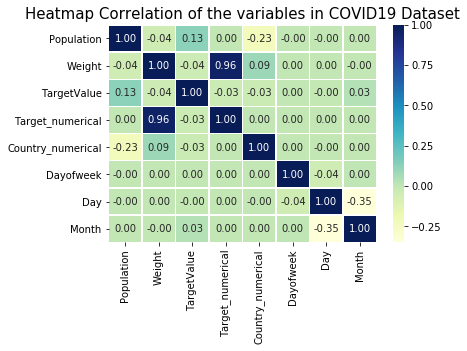

In [8]:
#CHECKING CORRELATION BETWEEN DIFFERENT COLUMNS NOW USING HEATMAP 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
plt.title("Heatmap Correlation of the variables in COVID19 Dataset", fontsize = 15)
sns.heatmap(train_df.corr(), annot=True, fmt=".2f",cmap='YlGnBu',linewidths=0.40)
plt.show()

In [9]:
#TRAIN TEST SPLIT 
from sklearn.model_selection import train_test_split

#Selecting feature columns
col_feat = ['Population', 'Weight','Target_numerical', 'Country_numerical', 'Dayofweek','Day', 'Month']
X = train_df[col_feat] # Features
y = train_df['TargetValue'] # Target variable
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [10]:
#CHECKING THE SHAPE
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:',   y_train.shape)
print('Testing Features Shape:',  X_test.shape)
print('Testing Labels Shape:',    y_test.shape)

Training Features Shape: (523605, 7)
Training Labels Shape: (523605,)
Testing Features Shape: (224403, 7)
Testing Labels Shape: (224403,)


In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
model = RandomForestRegressor(n_estimators = 50, random_state = 42)
# Train the model on training data
model.fit(X_train, y_train)
model.score(X_train,y_train)

0.9878134986191512

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_predicted= model.predict(X_test)
model.score(X_test,y_test)

0.9409930975185731

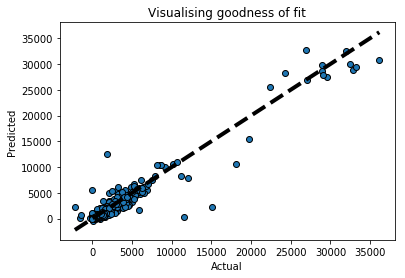

In [13]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Visualising goodness of fit")

plt.show()

In [14]:
#WORKING WITH TEST DATASET
test_col = ['Population', 'Weight','Target_numerical', 'Country_numerical', 'Dayofweek','Day', 'Month']
test_data = test_df[test_col]

In [15]:
test_df.head()

,Country_Region,Population,Weight,Date,Target,Target_numerical,Country_numerical,Dayofweek,Day,Month
ForecastId,,,,,,,,,,
1,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases,0,0,0,27,4
2,Afghanistan,27657145,0.583587,2020-04-27,Fatalities,1,0,0,27,4
3,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases,0,0,1,28,4
4,Afghanistan,27657145,0.583587,2020-04-28,Fatalities,1,0,1,28,4
5,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases,0,0,2,29,4


In [16]:
# predictions
y_predicted1 = model.predict(test_data)
y_predicted1

array([139.8 ,   5.46, 126.46, ...,   0.32,   1.42,   0.3 ])